In [1]:
from pytorch_lightning import Trainer
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from MVAE import *

In [2]:
TRAIN_MASK_DIR = './train/'

transform = transforms.Compose([transforms.Resize((32, 32)),
                                transforms.Grayscale(num_output_channels=1),
                                transforms.ToTensor()])

X_train = datasets.ImageFolder(root=TRAIN_MASK_DIR, transform=transform)
train_loader = DataLoader(X_train, batch_size=128, shuffle=True)

Decoders = nn.ModuleList([Decoder_MLP(latent_dim=100, in_channel=1, im_size=32, hiddens=[128, 256, 512]),
                          Decoder_MLP(latent_dim=100, in_channel=1, im_size=32, hiddens=[256, 512, 1024]),
                          Decoder_Conv(latent_dim=100, in_channel=1, im_size=32, hiddens=[1024, 512, 256, 128], init=2),
                          Decoder_Conv(latent_dim=100, in_channel=1, im_size=32, hiddens=[1024, 512, 256], init=4),
                          Decoder_Linear_Conv(latent_dim=100, in_channel=1, im_size=32, hiddens=[512, 256, 128, 64],
                                              init=2)])

MabVae = MabVAE(train_loader, Decoders, eps=0.3, i=0)

#device = torch.device(1 if torch.cuda.is_available() else 0)
trainer = Trainer(gpus=1, max_epochs=5)

trainer.fit(MabVae)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | decoders | ModuleList | 28.9 M
1 | encoder  | Encoder    | 3.1 M 
----------------------------------------
32.0 M    Trainable params
0         Non-trainable params
32.0 M    Total params
127.901   Total estimated model params size (MB)


Epoch 4: 100%|██████████| 32/32 [00:21<00:00,  1.51it/s, loss=2.82e+06, v_num=8]


In [16]:
device = torch.device(1 if torch.cuda.is_available() else 0)
device

device(type='cuda', index=1)

In [9]:
MabVae.NbDraws/torch.sum(MabVae.NbDraws)

tensor([0.6375, 0.0437, 0.1063, 0.1125, 0.1000], device='cuda:0')

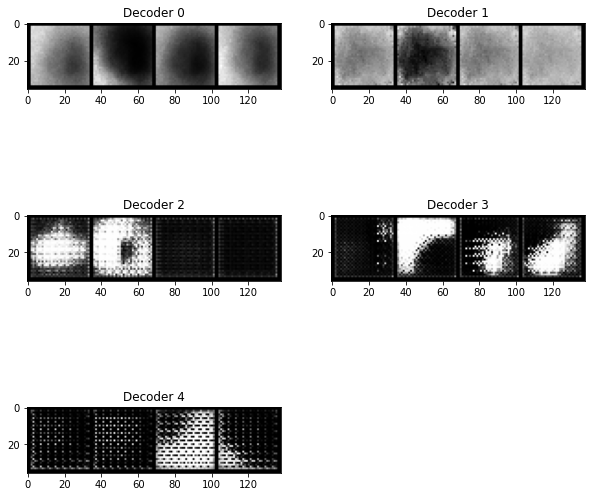

In [10]:
fixed_noise=torch.randn(4,100)
plt.figure(figsize=(10,10))
for i,decoder in enumerate(Decoders):
  fake=decoder(fixed_noise).detach()
  plt.subplot(3,2,i+1)
  plt.title(f'Decoder {i}')
  plt.imshow(np.transpose(utils.make_grid(fake,padding=2,normalize=True).cpu(),(1,2,0)))

plt.savefig(f'Decoders_MASK.png')